In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [7]:
# Chargement du dataset avec pandas en lui donnant date pour index

data = pd.read_csv('FINAL_USO.csv', parse_dates = True, index_col="Date")
data

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700


In [12]:
Adj_close = data["Adj Close"]

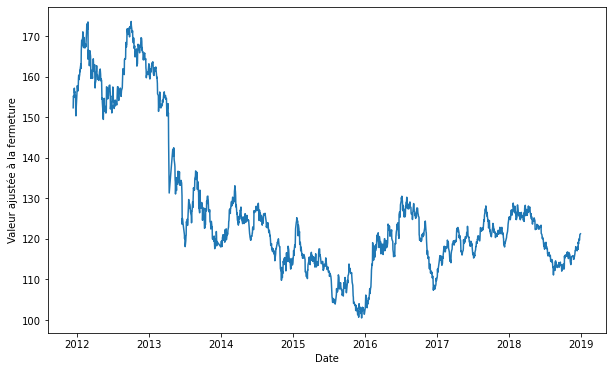

In [13]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Valeur ajustée à la fermeture')
plt.plot(Adj_close)
plt.show()

In [14]:
#Determine rolling statistics
rolmean = Adj_close.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = Adj_close.rolling(window=12).std()
print(rolmean,rolstd)

Date
2011-12-15           NaN
2011-12-16           NaN
2011-12-19           NaN
2011-12-20           NaN
2011-12-21           NaN
                 ...    
2018-12-24    118.093333
2018-12-26    118.224167
2018-12-27    118.465000
2018-12-28    118.758333
2018-12-31    119.046667
Name: Adj Close, Length: 1718, dtype: float64 Date
2011-12-15         NaN
2011-12-16         NaN
2011-12-19         NaN
2011-12-20         NaN
2011-12-21         NaN
                ...   
2018-12-24    0.845676
2018-12-26    0.958972
2018-12-27    1.153126
2018-12-28    1.330501
2018-12-31    1.469250
Name: Adj Close, Length: 1718, dtype: float64


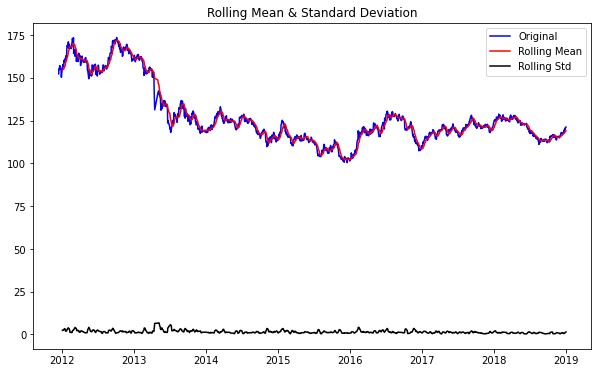

In [15]:
#Plot rolling statistics
orig = plt.plot(Adj_close, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [18]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(Adj_close, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -1.823460
p-value                           0.368878
#Lags Used                        1.000000
Number of Observations Used    1716.000000
Critical Value (1%)              -3.434166
Critical Value (5%)              -2.863226
Critical Value (10%)             -2.567667
dtype: float64


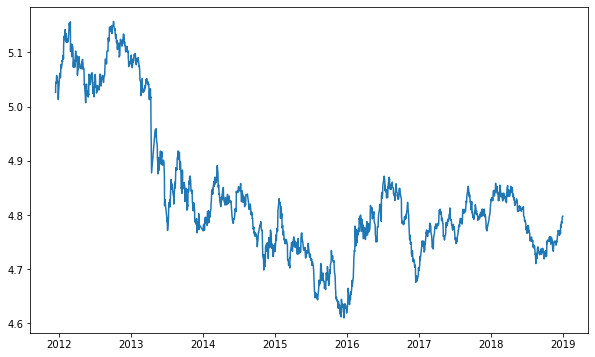

In [20]:
Adj_close_logScale = np.log(Adj_close)
plt.plot(Adj_close_logScale)
plt.show()

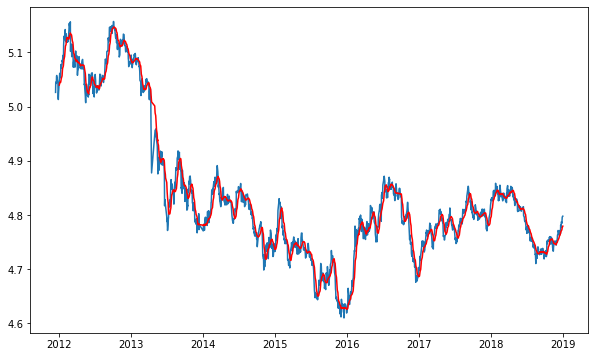

In [21]:
#The below transformation is required to make series stationary
movingAverage = Adj_close_logScale.rolling(window=12).mean()
movingSTD = Adj_close_logScale.rolling(window=12).std()
plt.plot(Adj_close_logScale)
plt.plot(movingAverage, color='red')

In [22]:
datasetLogScaleMinusMovingAverage = Adj_close_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

Date
2012-01-03    0.009738
2012-01-04    0.012430
2012-01-05    0.017877
2012-01-06    0.012949
2012-01-09    0.008742
2012-01-10    0.021542
2012-01-11    0.026097
2012-01-12    0.028392
2012-01-13    0.019076
2012-01-17    0.021764
Name: Adj Close, dtype: float64

In [43]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
      #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Adj Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

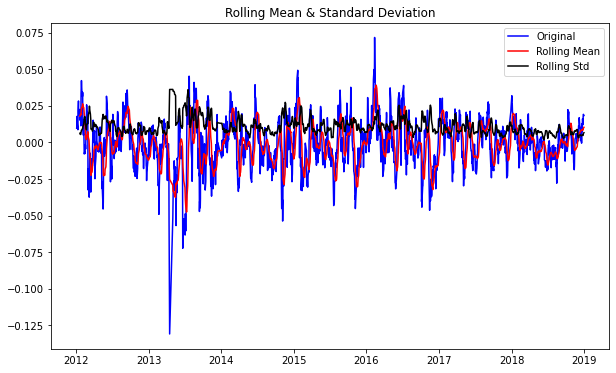

Results of Dickey Fuller Test:


KeyError: 'Adj Close'

In [44]:
test_stationarity(datasetLogScaleMinusMovingAverage)

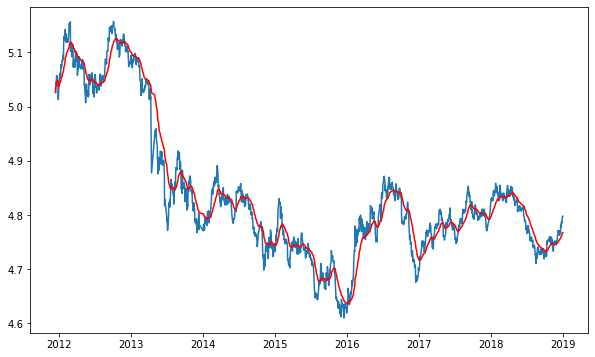

In [31]:
exponentialDecayWeightedAverage = Adj_close_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(Adj_close_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

In [40]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

NameError: name 'indexedDataset_logScale' is not defined

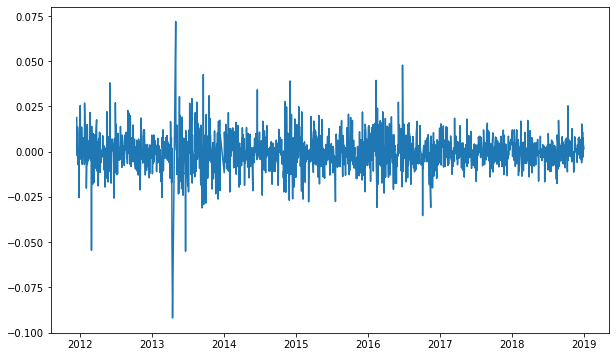

In [37]:
datasetLogDiffShifting = Adj_close_logScale - Adj_close_logScale.shift()
plt.plot(datasetLogDiffShifting)

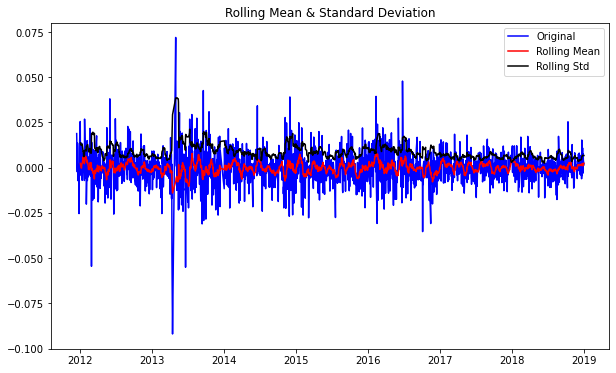

Results of Dickey Fuller Test:


KeyError: 'Adj Close'

In [45]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [47]:
decomposition = seasonal_decompose(Adj_close_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Adj_close_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None